#Setando o Ambiente

In [5]:
%pip install pandas
%pip install fastapi
%pip install numpy
%pip install plotly
%pip install seaborn
%pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 14.8 MB/s eta 0:00:00


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#Load Dataset

In [411]:
df = pd.read_csv("/content/desafio_indicium_imdb.csv")

In [412]:
#Removendo colunas que não serão utilizadas
df.drop(['Unnamed: 0'],axis = 1, inplace = True)

In [413]:
df.head()

Series_Title Released_Year Certificate  \
0                                  The Godfather          1972           A   
1                                The Dark Knight          2008          UA   
2                         The Godfather: Part II          1974           A   
3                                   12 Angry Men          1957           U   
4  The Lord of the Rings: The Return of the King          2003           U   

   Runtime                     Genre  IMDB_Rating  \
0  175 min              Crime, Drama         9.20   
1  152 min      Action, Crime, Drama         9.00   
2  202 min              Crime, Drama         9.00   
3   96 min              Crime, Drama         9.00   
4  201 min  Action, Adventure, Drama         8.90   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging patriarch t...      100.00   
1  When the menace known as the Joker wreaks havo...       84.00   
2  The early life and career of Vito Corleone in ...       90.00   
3  A jury holdout attempts to prevent a miscarria...       96.00   
4  Gandalf and Aragorn lead the World of Men agai...       94.00   

               Director           Star1            Star2          Star3  \
0  Francis Ford Coppola   Marlon Brando        Al Pacino     James Caan   
1     Christopher Nolan  Christian Bale     Heath Ledger  Aaron Eckhart   
2  Francis Ford Coppola       Al Pacino   Robert De Niro  Robert Duvall   
3          Sidney Lumet     Henry Fonda      Lee J. Cobb  Martin Balsam   
4         Peter Jackson     Elijah Wood  Viggo Mortensen   Ian McKellen   

           Star4  No_of_Votes        Gross  
0   Diane Keaton      1620367  134,966,411  
1  Michael Caine      2303232  534,858,444  
2   Diane Keaton      1129952   57,300,000  
3   John Fiedler       689845    4,360,000  
4  Orlando Bloom      1642758  377,845,905

#Limpeza e ajustes no dataset

Antes de iniciar qualquer análise, é muito importante garantir que os dados estão limpos, ou seja, não deixar células vazias, células com valores duplicados e  não deixar os dados com tipos diferentes dos que precisam para serem analizados.


In [414]:
# Verificanddo colunas com células vazias
df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [415]:
# Verificando existência de linhas duplicadas
print('Duplicated Values :', df.duplicated().sum())

Duplicated Values : 0


Ao verificar as informações do dataset, pode-se perceber que algumas colunas possuem o datatype diferente do necessário para a análise, como por exemplo no caso da coluna 'Released_Year' ou 'Gross', que precisam de ser analizados como valores numéricos mas estão com o datatype
Sendo assim algumas mudanças serão aplicadas.

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 117.2+ KB


In [417]:
# Calcular a frequência dos valores na coluna 'Certificate'
frequencia_certificados = df['Certificate'].value_counts()

print(frequencia_certificados)

Certificate
U           234
A           196
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: count, dtype: int64


Para preencher valores vazios utilizarei a média dos valores nas coluna em que a célula pertence para preencher, no caso de variáveis no tipo "object" como a coluna 'Certificate', a célula será preenchida com o valor mais comum na coluna.

In [418]:
# Como a maioria dos filmes são "U", os valores vazios serão preenchidos por este.
df['Certificate'].fillna('U',inplace=True)

# Utilizando os valor médio do "Meta_score" para preencher as células vazias
df['Meta_score'].fillna(df['Meta_score'].mean(),inplace=True)

In [419]:
# Conversão do tipo de dado da coluna "Gross"
df["Gross"] = df["Gross"].str.replace(",","")
df["Gross"] = df["Gross"].replace(np.nan, 0)
df["Gross"] = df["Gross"].astype(int)

# Preenchendo os valores vazios na coluna Gross com o valor médio da mesma.
df["Gross"] = df["Gross"].replace(0,df['Gross'].mean())

In [420]:
# Extrair apenas a parte numérica
df["Runtime"] = df["Runtime"].str.extract('(\d+)')

# Remover valores nulos
df = df[df["Runtime"].notnull()]

# Converter para inteiro
df["Runtime"] = df["Runtime"].astype(int)

In [421]:
# Converter colunas categóricas para string
df['Certificate'] = df['Certificate'].astype(str)
df['Genre'] = df['Genre'].astype(str)

In [422]:
# Conferindo novamente a existência de valores nulos
df.isnull().sum()

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [423]:
# Ao tentar mudar o ano de lançamento dos filmes para o tipo int, ocorre um erro
# Tal erro acontece pelo fato de existir um valor não numérico na coluna, o "PG"
df['Released_Year'].value_counts()

Released_Year
2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1926     1
1937     1
1936     1
1924     1
PG       1
Name: count, Length: 100, dtype: int64

In [424]:
# Encontrar a linha onde a coluna 'Released_Year' tem o valor 'PG'
filme_com_pg = df[df['Released_Year'] == 'PG']

# Mostrar o filme e seus dados
print(filme_com_pg)

    Series_Title Released_Year Certificate  Runtime  \
965    Apollo 13            PG           U      140   

                         Genre  IMDB_Rating  \
965  Adventure, Drama, History         7.60   

                                              Overview  Meta_score  \
965  NASA must devise a strategy to return Apollo 1...       77.00   

       Director      Star1        Star2        Star3        Star4  \
965  Ron Howard  Tom Hanks  Bill Paxton  Kevin Bacon  Gary Sinise   

     No_of_Votes        Gross  
965       269197 173837933.00  


In [425]:
# Ajustar o valor 'PG' na coluna 'Released_Year' para '1995'
# Após uma breve pesquisa no google podemos constatar que o filme em questão é
# de 1995, sendo assim a data foi alterada.
# Em casos como estes , é comum também a remorção do dádo da análise, mas como foi um caso simples, preferi apenas modificar.
df.loc[df['Released_Year'] == 'PG', 'Released_Year'] = '1995'

In [426]:
#Agora, o típo do dado no "Released_Year pode ser modificado"
df['Released_Year']=df['Released_Year'].astype(int)

In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Certificate    999 non-null    object 
 3   Runtime        999 non-null    int64  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     999 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          999 non-null    float64
dtypes: float64(3), int64(3), object(9)
memory usage: 117.2+ KB


In [428]:
# É interessante notar que a coluna de Genero possui multiplas variáveis em algumas células,
# sendo assim é interessante tornar suas variáveis em uma lista
# O que facilita futuras análises
df['Genre'] = df['Genre'].apply(lambda x: x.split(', '))

In [429]:
df.head()

Series_Title  Released_Year Certificate  \
0                                  The Godfather           1972           A   
1                                The Dark Knight           2008          UA   
2                         The Godfather: Part II           1974           A   
3                                   12 Angry Men           1957           U   
4  The Lord of the Rings: The Return of the King           2003           U   

   Runtime                       Genre  IMDB_Rating  \
0      175              [Crime, Drama]         9.20   
1      152      [Action, Crime, Drama]         9.00   
2      202              [Crime, Drama]         9.00   
3       96              [Crime, Drama]         9.00   
4      201  [Action, Adventure, Drama]         8.90   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging patriarch t...      100.00   
1  When the menace known as the Joker wreaks havo...       84.00   
2  The early life and career of Vito Corleone in ...       90.00   
3  A jury holdout attempts to prevent a miscarria...       96.00   
4  Gandalf and Aragorn lead the World of Men agai...       94.00   

               Director           Star1            Star2          Star3  \
0  Francis Ford Coppola   Marlon Brando        Al Pacino     James Caan   
1     Christopher Nolan  Christian Bale     Heath Ledger  Aaron Eckhart   
2  Francis Ford Coppola       Al Pacino   Robert De Niro  Robert Duvall   
3          Sidney Lumet     Henry Fonda      Lee J. Cobb  Martin Balsam   
4         Peter Jackson     Elijah Wood  Viggo Mortensen   Ian McKellen   

           Star4  No_of_Votes        Gross  
0   Diane Keaton      1620367 134966411.00  
1  Michael Caine      2303232 534858444.00  
2   Diane Keaton      1129952  57300000.00  
3   John Fiedler       689845   4360000.00  
4  Orlando Bloom      1642758 377845905.00

Com isso temos o dataset com os dados limpos e organizados para futuras análises.

#Separar em categórica e numérica

In [430]:
# Selecionar colunas categóricas
categorical = df.select_dtypes(include='object').columns

# Selecionar colunas numéricas
numerical = df.select_dtypes(exclude='object').columns

print("Colunas Categóricas:", categorical)
print("Colunas Numéricas:", numerical)

Colunas Categóricas: Index(['Series_Title', 'Certificate', 'Genre', 'Overview', 'Director', 'Star1',
       'Star2', 'Star3', 'Star4'],
      dtype='object')
Colunas Numéricas: Index(['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes',
       'Gross'],
      dtype='object')


In [431]:
# Ajustar as configurações de exibição do pandas
pd.set_option('display.float_format', '{:.2f}'.format)
df[categorical].describe().T

count unique                                                top  \
Series_Title   999    998                                           Drishyam   
Certificate    999     16                                                  U   
Genre          999    202                                            [Drama]   
Overview       999    999  An organized crime dynasty's aging patriarch t...   
Director       999    548                                   Alfred Hitchcock   
Star1          999    659                                          Tom Hanks   
Star2          999    840                                        Emma Watson   
Star3          999    890                                       Rupert Grint   
Star4          999    938                                      Michael Caine   

             freq  
Series_Title    2  
Certificate   335  
Genre          84  
Overview        1  
Director       14  
Star1          12  
Star2           7  
Star3           5  
Star4           4

In [432]:
# Ajustar as configurações de exibição do pandas
pd.set_option('display.float_format', '{:.2f}'.format)
df[numerical].describe().T

count        mean          std      min        25%         50%  \
Released_Year 999.00     1991.22        23.30  1920.00    1976.00     1999.00   
Runtime       999.00      122.87        28.10    45.00     103.00      119.00   
IMDB_Rating   999.00        7.95         0.27     7.60       7.70        7.90   
Meta_score    999.00       77.97        11.37    28.00      72.00       77.97   
No_of_Votes   999.00   271621.42    320912.62 25088.00   55471.50   138356.00   
Gross         999.00 66134172.85 100172486.69  1305.00 5011838.50 42438300.00   

                      75%          max  
Released_Year     2009.00      2020.00  
Runtime            137.00       321.00  
IMDB_Rating          8.10         9.20  
Meta_score          85.50       100.00  
No_of_Votes     373167.50   2303232.00  
Gross         61576564.50 936662225.00

#Q1 - Análise exploratória

A primeira coisa na análise será o mapa de calor, com ele é possível analisar a correlação entre cada um dos dados numéricos, e nos adianta um tempo de ficar analisando gráficos que algumas vezes não levam a lugar nenhum pela baixa correlação.

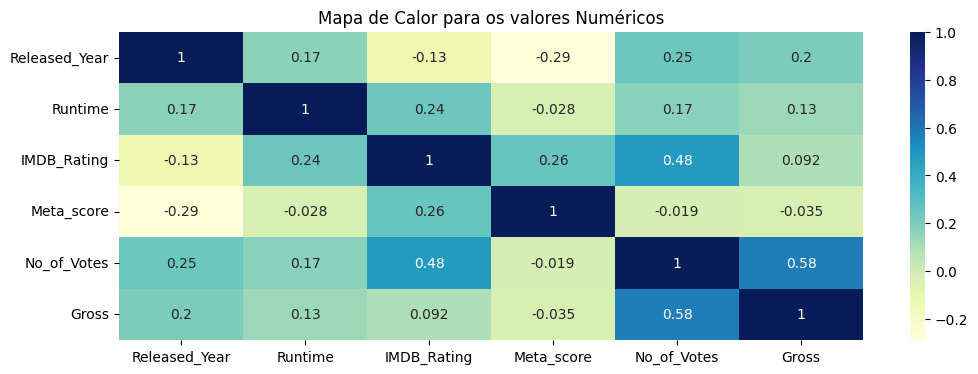

In [433]:
corr = df[numerical].corr()
plt.figure(figsize=(12,4))
sns.heatmap(corr, annot= True,cmap='YlGnBu')
plt.title('Mapa de Calor para os valores Numéricos')
plt.show()

- Logo de cara é possível analisar que O número de votos é altamente correlacionado com o IMDB, assim como ele também é altamente correlacionado com o faturamento do filme.
- O Faturamento não se relaciona com o Meta Score, mas ele tem uma leve relação com a data de lançamento, o que pode indicar que filmes mais novos possuem faturamentos um pouco maior.
- O Metascore se Relaciona levemente com o IMDB.
- Filmes mais longos tendem a ter avaliações ligeiramente melhores no IMDb. No entanto, a duração não parece ser um fator crítico para a crítica profissional, como indicado pela baixa correlação com o Metascore.
- O IMDB Se relaciona pouco com o ano de lançamento, mas o número de votos se relaciona levemente com ele, sendo assim é possível analisar que apesar de o ano de lançamento não interferir no IMDB diretamente , ele interfere na quantidade de votos, o que por consequencia interfere no IMDB

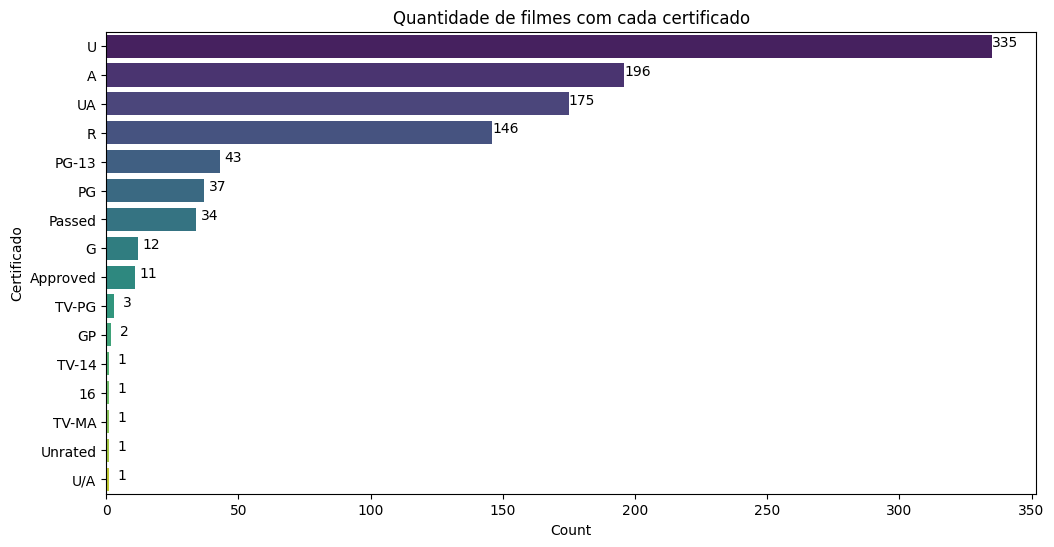

In [434]:
# Contar a frequência de cada certificado
certificados_count = df['Certificate'].value_counts()

# Criar um DataFrame temporário para facilitar o uso de `hue`
temp_df = pd.DataFrame({'Certificate': certificados_count.index, 'Count': certificados_count.values})

# Plotar o gráfico de barras horizontal
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Count', y='Certificate', data=temp_df, palette='viridis', hue='Certificate', dodge=False, legend=False)

# Adicionar rótulos de contagem a cada barra
for i in range(len(temp_df)):
    ax.text(temp_df['Count'][i] + 5, i, str(temp_df['Count'][i]), color='black', ha="center")

plt.ylabel('Certificado')
plt.title('Quantidade de filmes com cada certificado')
plt.show()

- **Observação**:
A maioria dos filmes no top 1000 são "U" o que significa que a maioria é amigável a todos os públicos

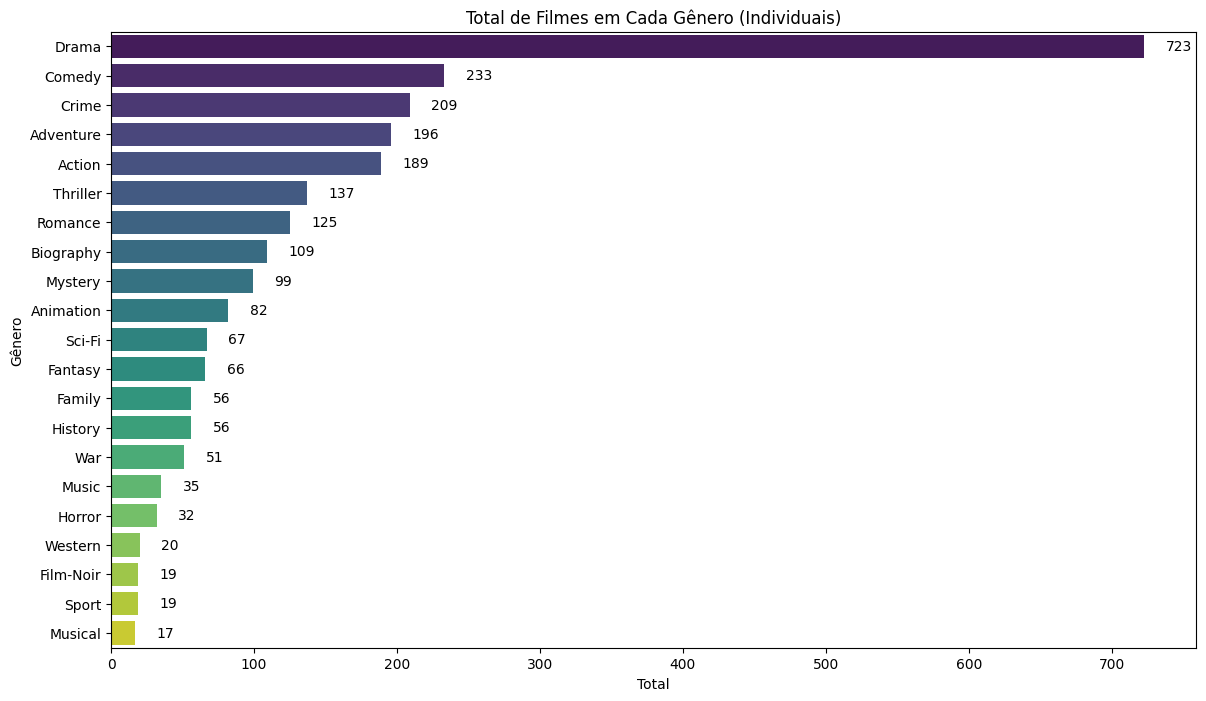

In [435]:
# Contar a frequência de cada gênero
all_genres = [genre for sublist in df['Genre'] for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts()

# Criar um DataFrame temporário para facilitar o uso de `hue`
temp_genre_df = pd.DataFrame({'Genre': genre_counts.index, 'Count': genre_counts.values})

# Plotar o gráfico de barras horizontal
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Count', y='Genre', data=temp_genre_df, palette='viridis', hue='Genre', dodge=False, legend=False)

# Adicionar rótulos de contagem a cada barra
for i in range(len(temp_genre_df)):
    ax.text(temp_genre_df['Count'][i] + 15, i, str(temp_genre_df['Count'][i]), color='black', va="center")

plt.xlabel('Total')
plt.ylabel('Gênero')
plt.title('Total de Filmes em Cada Gênero (Individuais)')
plt.show()

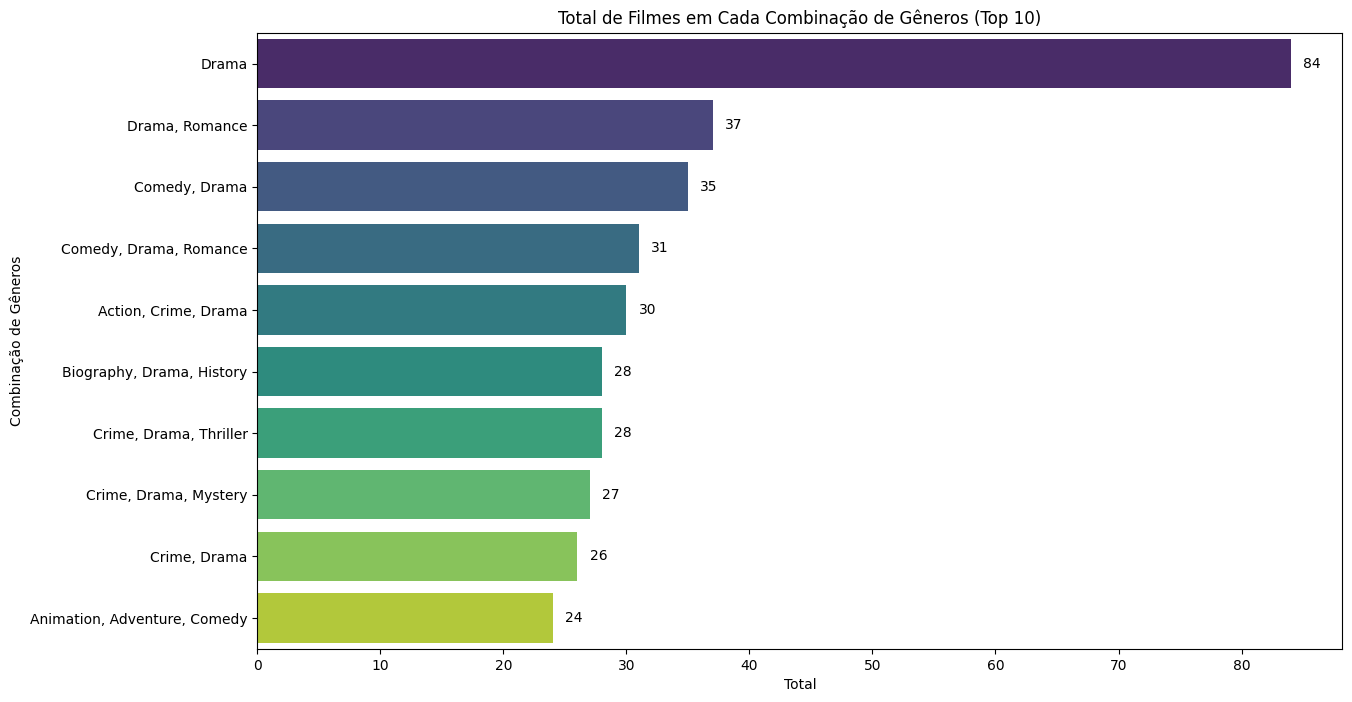

In [436]:
# Contar a frequência das combinações de gêneros originais
genre_combinations_count = df['Genre'].apply(lambda x: ', '.join(x)).value_counts()

# Limitar o número de combinações mostradas (por exemplo, as 20 mais comuns)
top_genre_combinations = genre_combinations_count.head(10)

# Criar um DataFrame temporário para facilitar o uso de `hue`
temp_comb_genre_df = pd.DataFrame({'Genre Combination': top_genre_combinations.index, 'Count': top_genre_combinations.values})

# Plotar o gráfico de barras horizontal
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Count', y='Genre Combination', data=temp_comb_genre_df, palette='viridis', hue='Genre Combination', dodge=False, legend=False)

# Adicionar rótulos de contagem a cada barra
for i in range(len(temp_comb_genre_df)):
    ax.text(temp_comb_genre_df['Count'][i] + 1, i, str(temp_comb_genre_df['Count'][i]), color='black', va="center")

plt.xlabel('Total')
plt.ylabel('Combinação de Gêneros')
plt.title('Total de Filmes em Cada Combinação de Gêneros (Top 10)')
plt.show()

- **Observação**:
A maioria esmagadora dos filmes no top 1000 são dogênero ou possuem o gênero "Drama".

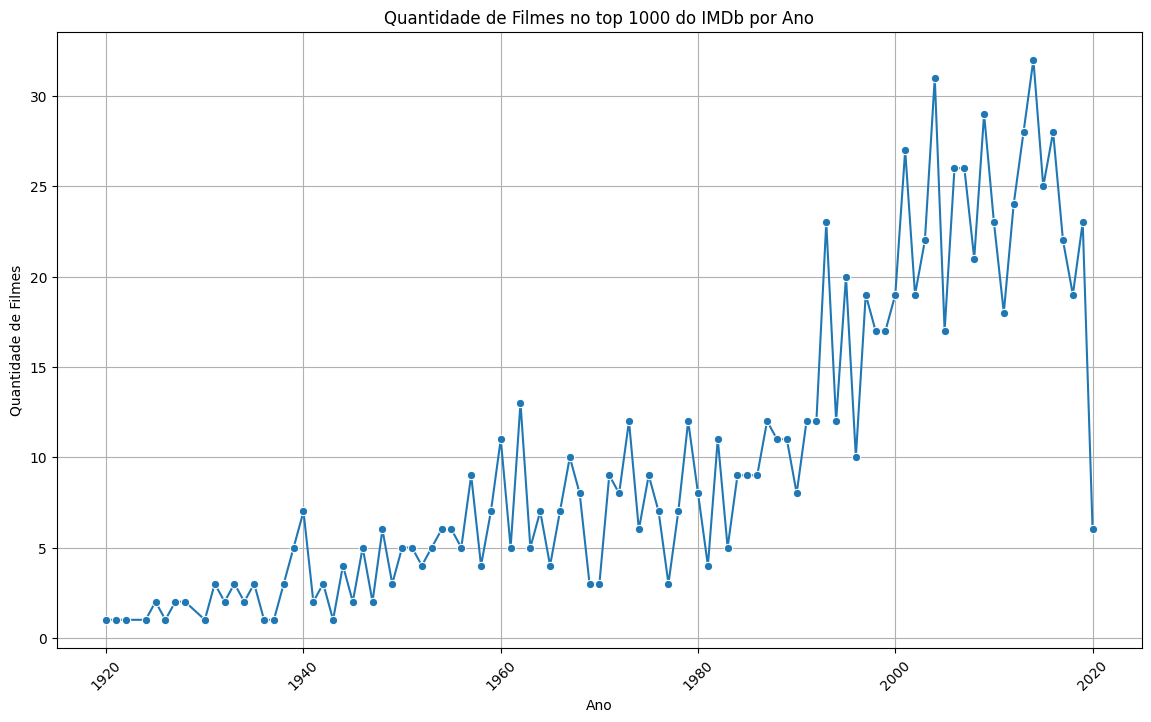

In [437]:
# Contar a frequência de filmes por ano
filmes_por_ano = df['Released_Year'].value_counts().sort_index()

# Criar um DataFrame temporário para facilitar a plotagem
temp_ano_df = pd.DataFrame({'Year': filmes_por_ano.index, 'Count': filmes_por_ano.values})

# Plotar o gráfico de linhas
plt.figure(figsize=(14, 8))
ax = sns.lineplot(x='Year', y='Count', data=temp_ano_df, marker='o')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Filmes')
plt.title('Quantidade de Filmes no top 1000 do IMDb por Ano')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

- **Observação**:
A quantidades de filmes a entrar no top 1000 aumentou ao longo dos anos, tendo uma queda significativa entre 2019 e 2020, provavelmente causada pela pandemia.

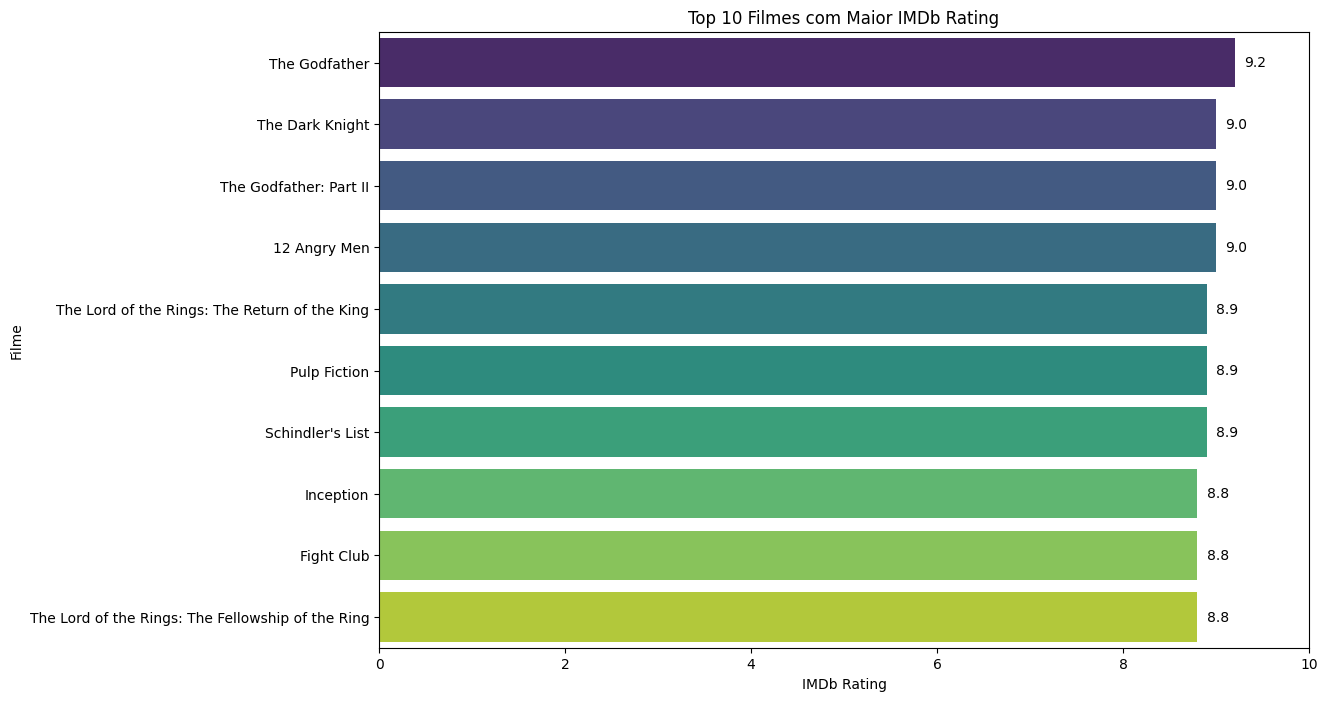

In [438]:
# Top 10 filmes com maior IMDb Rating
top10_imdb = df.nlargest(10, 'IMDB_Rating')

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='IMDB_Rating', y='Series_Title', data=top10_imdb, palette='viridis', hue='Series_Title', dodge=False, legend=False)
plt.xlabel('IMDb Rating')
plt.ylabel('Filme')
plt.title('Top 10 Filmes com Maior IMDb Rating')
plt.xlim(0, 10)

# Adicionar os valores na frente de cada barra
for i in range(len(top10_imdb)):
    ax.text(top10_imdb['IMDB_Rating'].values[i] + 0.1, i, round(top10_imdb['IMDB_Rating'].values[i], 2), color='black', va="center")

plt.show()

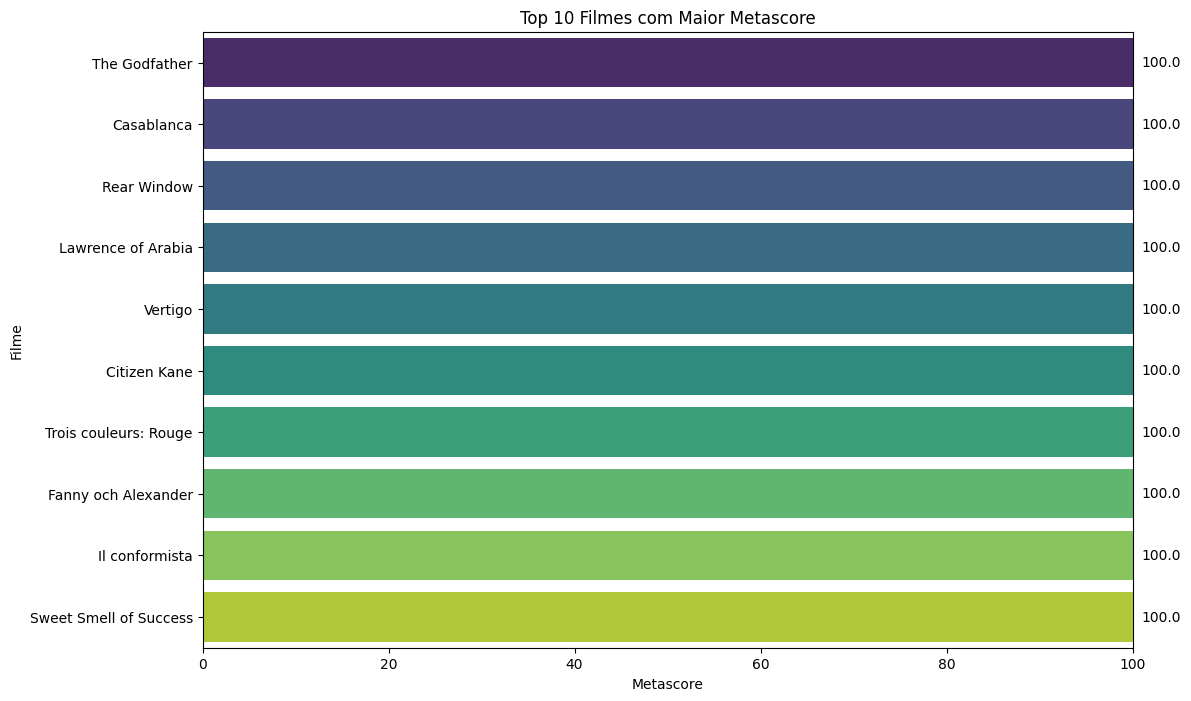

In [439]:
# Top 10 filmes com maior Metascore
top10_metascore = df.nlargest(10, 'Meta_score')

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Meta_score', y='Series_Title', data=top10_metascore, palette='viridis', hue='Series_Title', dodge=False, legend=False)
plt.xlabel('Metascore')
plt.ylabel('Filme')
plt.title('Top 10 Filmes com Maior Metascore')
plt.xlim(0, 100)

# Adicionar os valores na frente de cada barra
for i in range(len(top10_metascore)):
    ax.text(top10_metascore['Meta_score'].values[i] + 1, i, round(top10_metascore['Meta_score'].values[i], 2), color='black', va="center")

plt.show()

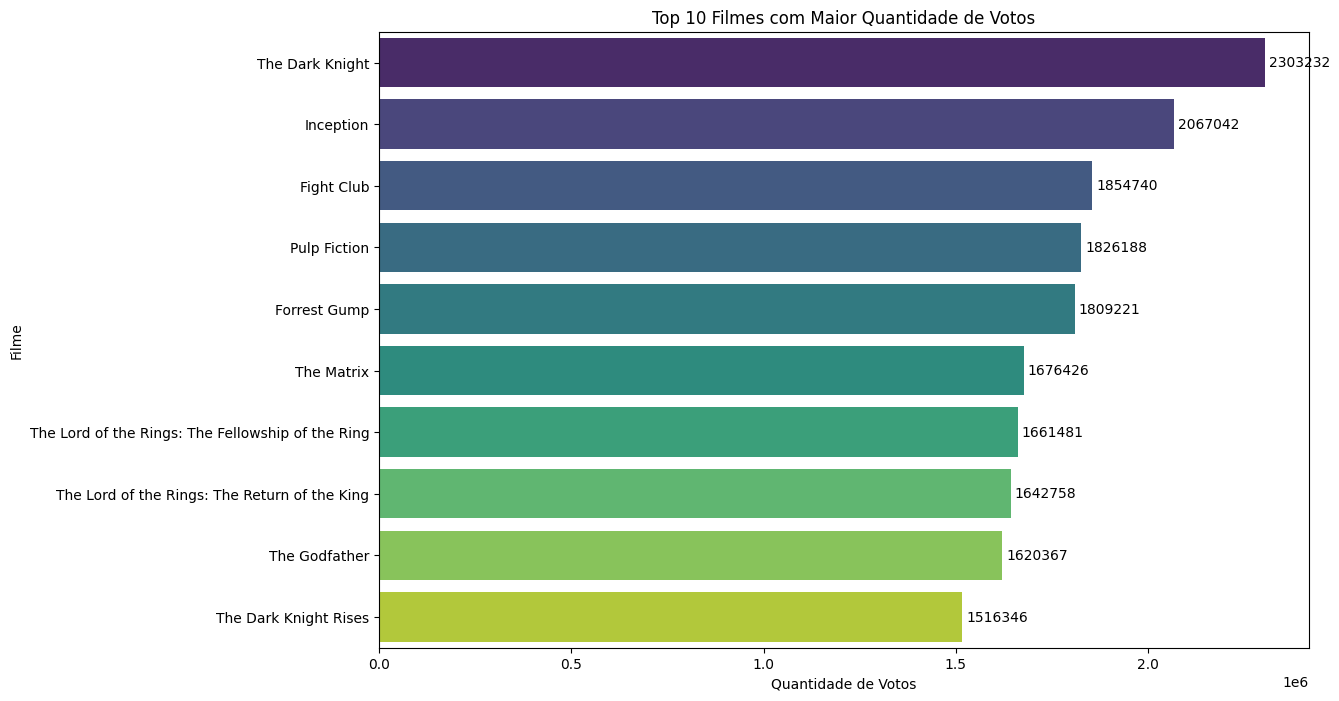

In [440]:
# Top 10 filmes com maior quantidade de votos
top10_votes = df.nlargest(10, 'No_of_Votes')

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='No_of_Votes', y='Series_Title', data=top10_votes, palette='viridis', hue='Series_Title', dodge=False, legend=False)
plt.xlabel('Quantidade de Votos')
plt.ylabel('Filme')
plt.title('Top 10 Filmes com Maior Quantidade de Votos')

# Adicionar os valores na frente de cada barra
for i in range(len(top10_votes)):
    ax.text(top10_votes['No_of_Votes'].values[i] + 10000, i, top10_votes['No_of_Votes'].values[i], color='black', va="center")

plt.show()


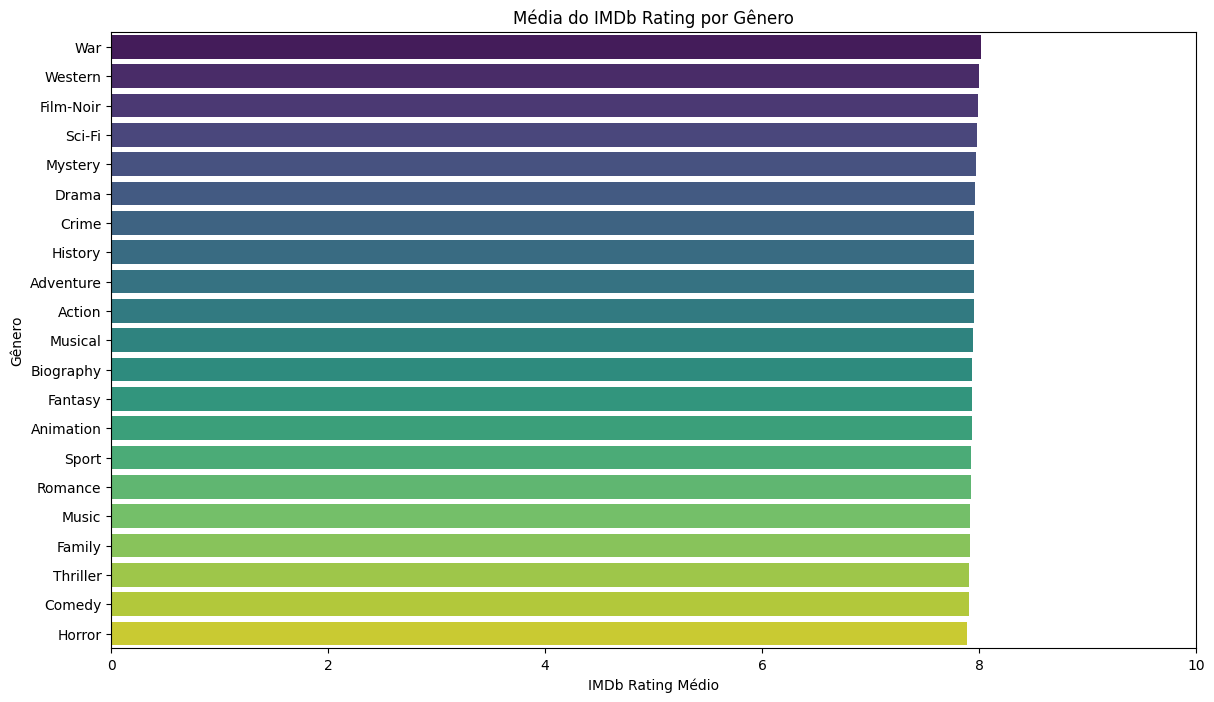

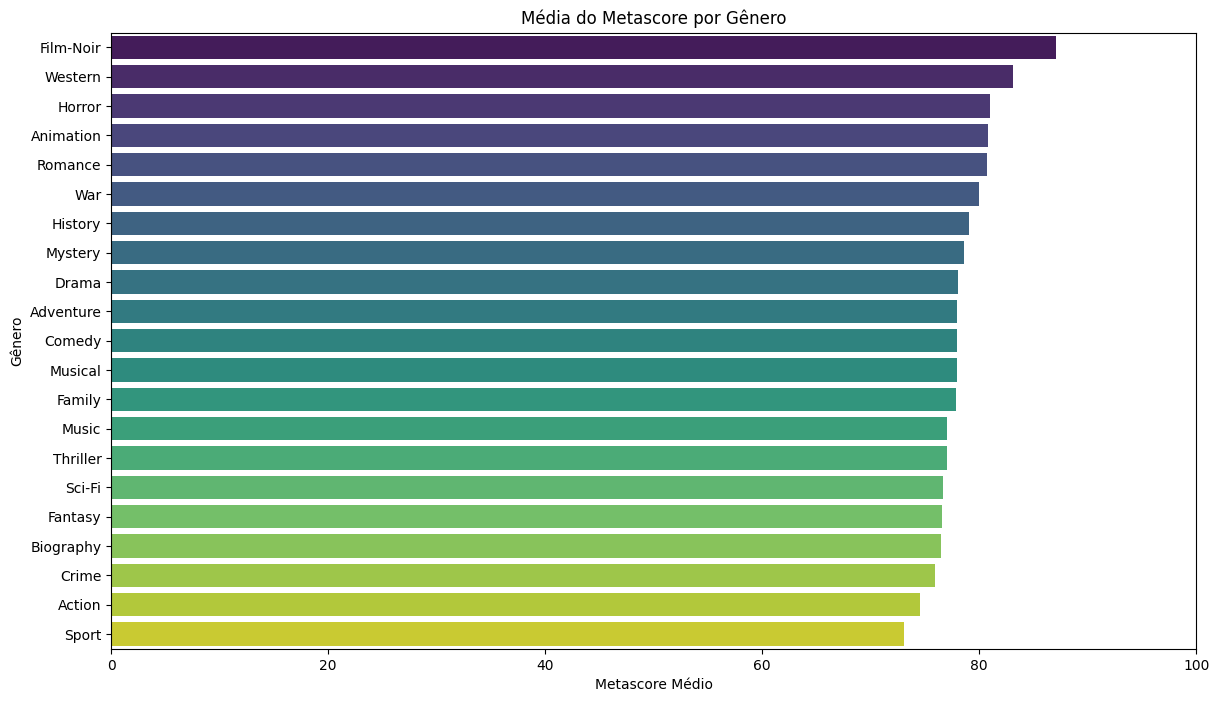

In [441]:
# Certifique-se de que as colunas estão no formato numérico
df['IMDB_Rating'] = pd.to_numeric(df['IMDB_Rating'], errors='coerce')
df['Meta_score'] = pd.to_numeric(df['Meta_score'], errors='coerce')

# Explodir a coluna de gêneros para lidar com múltiplos gêneros em uma única célula
df_exploded = df.explode('Genre').reset_index(drop=True)

# Calcular a média do IMDb Rating para cada gênero
genre_imdb_mean = df_exploded.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False)

# Plotar o gráfico para IMDb Rating
plt.figure(figsize=(14, 8))
sns.barplot(x=genre_imdb_mean.values, y=genre_imdb_mean.index, palette='viridis', hue=genre_imdb_mean.index, dodge=False, legend=False)
plt.xlabel('IMDb Rating Médio')
plt.ylabel('Gênero')
plt.title('Média do IMDb Rating por Gênero')
plt.xlim(0, 10)
plt.show()

# Calcular a média do Metascore para cada gênero
genre_meta_mean = df_exploded.groupby('Genre')['Meta_score'].mean().sort_values(ascending=False)

# Plotar o gráfico para Metascore
plt.figure(figsize=(14, 8))
sns.barplot(x=genre_meta_mean.values, y=genre_meta_mean.index, palette='viridis', hue=genre_meta_mean.index, dodge=False, legend=False)
plt.xlabel('Metascore Médio')
plt.ylabel('Gênero')
plt.title('Média do Metascore por Gênero')
plt.xlim(0, 100)
plt.show()


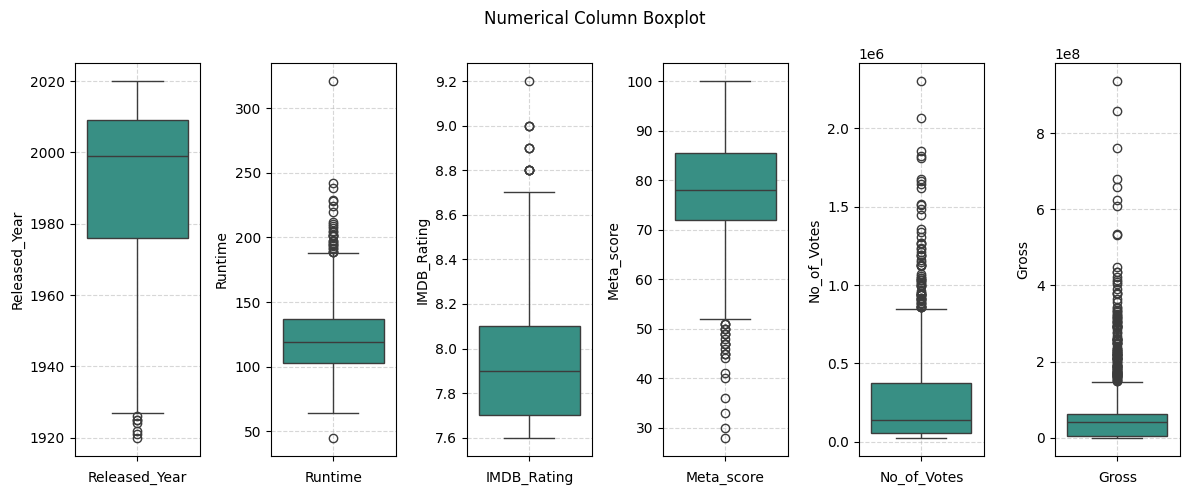

In [442]:
numerical = df.select_dtypes(exclude='object').columns

plt.figure(figsize=(12,5))
for i in range(len(numerical)):
    plt.subplot(1, len(numerical), i + 1)
    sns.boxplot(y=df[numerical[i]], color='#2a9d8f')
    plt.grid(True, linestyle='dashed', alpha=0.5)
    plt.xlabel(numerical[i])
plt.suptitle('Numerical Column Boxplot')

plt.tight_layout()
plt.show()

# Q2 - Perguntas

##Q2 - a) Qual filme você recomendaria para uma pessoa que você não conhece?


Para responder esta pergunta, é necessário entender "O que faz um bom filme?", felizmente a análise exploratória gerou alguns insights que podem ser seguidos para responder esta pergunta.

- Foi considerado que o que faz um bom filme é um conjunto de dados, sendo eles a nota do IMDB, o número de votos, o Gênero do filme, o Meta_score e a duração do filme.
- Sendo assim , foi realizado um cálculo onde foi agregado um peso a cada um dos dados, e baseado nos pesos e nos dados buscados no dataset, a função retorna o melhor filme.

Calcular a Média dos Ratings por Gênero e depois Calcular a Pontuação Ponderada

In [443]:
# Certifique-se de que as colunas estão no formato numérico
df['IMDB_Rating'] = pd.to_numeric(df['IMDB_Rating'], errors='coerce')
df['Meta_score'] = pd.to_numeric(df['Meta_score'], errors='coerce')
df['No_of_Votes'] = pd.to_numeric(df['No_of_Votes'], errors='coerce')
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')

# Explodir a coluna de gêneros para lidar com múltiplos gêneros em uma única célula
df_exploded = df.explode('Genre').reset_index(drop=True)

# Calcular a média do IMDb Rating e Metascore para cada gênero
genre_imdb_mean = df_exploded.groupby('Genre')['IMDB_Rating'].mean()
genre_meta_mean = df_exploded.groupby('Genre')['Meta_score'].mean()

# Criar um DataFrame secundário para armazenar os cálculos adicionais
df_secondary = df.copy()

# Adicionar essas médias ao DataFrame secundário
df_secondary['Genre_IMDB_Mean'] = df_secondary['Genre'].apply(lambda x: genre_imdb_mean.loc[x].mean() if isinstance(x, list) else genre_imdb_mean.loc[x])
df_secondary['Genre_Meta_Mean'] = df_secondary['Genre'].apply(lambda x: genre_meta_mean.loc[x].mean() if isinstance(x, list) else genre_meta_mean.loc[x])

# Definir os pesos
weights = {
    'IMDB_Rating': 0.40,
    'No_of_Votes': 0.30,
    'Meta_score': 0.15,
    'Genre_IMDB_Mean': 0.10,
    'Runtime': 0.05
}

# Normalizar os valores no DataFrame secundário
df_secondary['IMDB_Rating_Norm'] = df_secondary['IMDB_Rating'] / 10
df_secondary['No_of_Votes_Norm'] = df_secondary['No_of_Votes'] / df_secondary['No_of_Votes'].max()
df_secondary['Genre_IMDB_Mean_Norm'] = df_secondary['Genre_IMDB_Mean'] / 10
df_secondary['Meta_score_Norm'] = df_secondary['Meta_score'] / 100
df_secondary['Runtime_Norm'] = df_secondary['Runtime'] / df_secondary['Runtime'].max()

# Calcular a pontuação ponderada no DataFrame secundário
df_secondary['Weighted_Score'] = (
    df_secondary['IMDB_Rating_Norm'] * weights['IMDB_Rating'] +
    df_secondary['No_of_Votes_Norm'] * weights['No_of_Votes'] +
    df_secondary['Genre_IMDB_Mean_Norm'] * weights['Genre_IMDB_Mean'] +
    df_secondary['Meta_score_Norm'] * weights['Meta_score'] +
    df_secondary['Runtime_Norm'] * weights['Runtime']
)

# Ordenar os filmes pela pontuação ponderada
top_weighted_movies = df_secondary.sort_values(by='Weighted_Score', ascending=False).head(10)

# Exibir os resultados
print("Top Filmes Recomendados com Pontuação Ponderada:")
print(top_weighted_movies[['Series_Title', 'Genre', 'IMDB_Rating', 'No_of_Votes', 'Genre_IMDB_Mean', 'Meta_score', 'Runtime', 'Weighted_Score']])


Top Filmes Recomendados com Pontuação Ponderada:
                                         Series_Title  \
1                                     The Dark Knight   
5                                        Pulp Fiction   
0                                       The Godfather   
7                                           Inception   
4       The Lord of the Rings: The Return of the King   
9   The Lord of the Rings: The Fellowship of the Ring   
10                                       Forrest Gump   
8                                          Fight Club   
12              The Lord of the Rings: The Two Towers   
13                                         The Matrix   

                          Genre  IMDB_Rating  No_of_Votes  Genre_IMDB_Mean  \
1        [Action, Crime, Drama]         9.00      2303232             7.95   
5                [Crime, Drama]         8.90      1826188             7.96   
0                [Crime, Drama]         9.20      1620367             7.96   
7   [Action

Levando em consideração os pesos por mim escolhidos, o melhor filme para indicar á alguém desconhecido seria o "The Dark Knight".

##Q2 - b) Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?


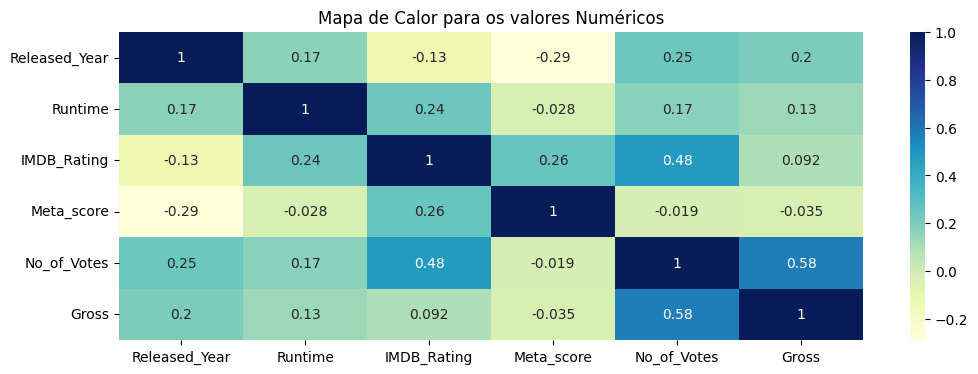

In [444]:
corr = df[numerical].corr()
plt.figure(figsize=(12,4))
sns.heatmap(corr, annot= True,cmap='YlGnBu')
plt.title('Mapa de Calor para os valores Numéricos')
plt.show()

Analisando novamente o mapa de calor, é possível verificar os dados que mais interferem no faturamento do filme.
- O Primeiro fator é o número de votos, isse indicador aponta a popularidade do filme, e quanto mais popular, maior o faturamento. A popularidade de um filme se dá pela popuaridade de seu gênero, atores e do diretor do filme, assim como a campanha de marketing agregada ao filme.
- Com o aumento da acessibilidade , filmes mais recentes costumam faturar mais.
- O tempo de duração do filme linear ao seu faturamento, sendo assim, filmes mais longos tendem a faturar mais.
- Apesar de o IMDB influenciar, ele não influencia o suficiente para valer a pena a análise.

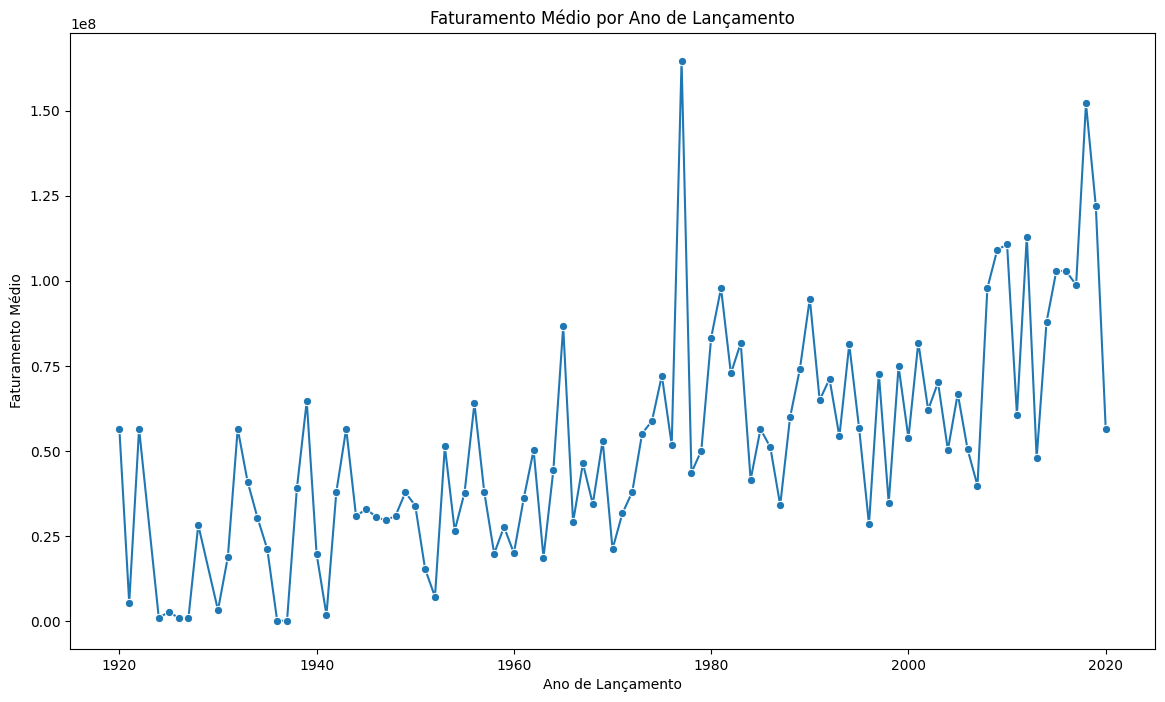

In [445]:
# Calcular a média do faturamento para cada ano de lançamento
year_gross_mean = df.groupby('Released_Year')['Gross'].mean().sort_values(ascending=False)

# Plotar o gráfico
plt.figure(figsize=(14, 8))
sns.lineplot(x=year_gross_mean.index, y=year_gross_mean.values, marker='o')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Faturamento Médio')
plt.title('Faturamento Médio por Ano de Lançamento')
plt.show()


Soma total do faturamento para cada gênero.

<ipython-input-446-15efe34ec021>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=director_gross_total.values, y=director_gross_total.index, dodge=False, palette='viridis')


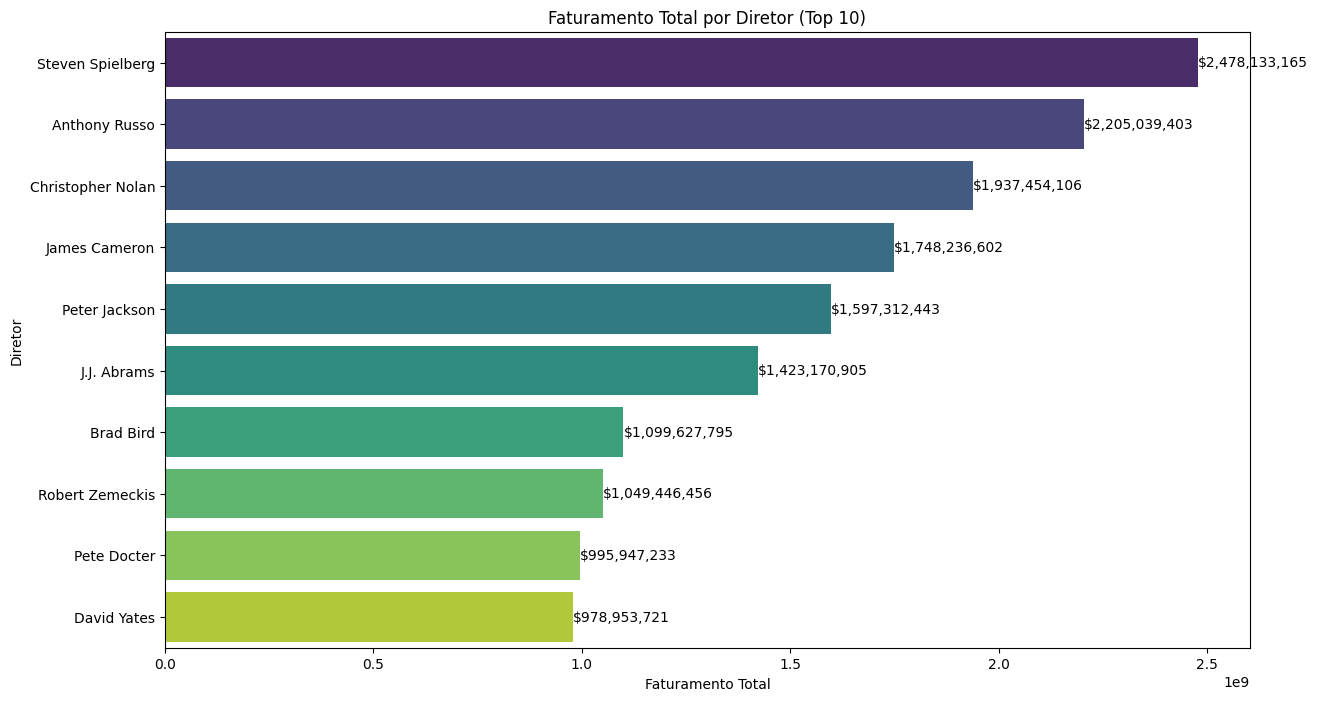

In [446]:
# Calcular o faturamento total para cada diretor
director_gross_total = df.groupby('Director')['Gross'].sum().sort_values(ascending=False).head(10)

# Plotar o gráfico
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=director_gross_total.values, y=director_gross_total.index, dodge=False, palette='viridis')

# Adicionar rótulos de valor a cada barra
for i in range(len(director_gross_total)):
    ax.text(director_gross_total.values[i] + 1, i, f'${director_gross_total.values[i]:,.0f}', color='black', va="center")

plt.xlabel('Faturamento Total')
plt.ylabel('Diretor')
plt.title('Faturamento Total por Diretor (Top 10)')
plt.show()


<ipython-input-447-cd94c97d6169>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=stars_votes_total.values, y=stars_votes_total.index, dodge=False, palette='viridis')


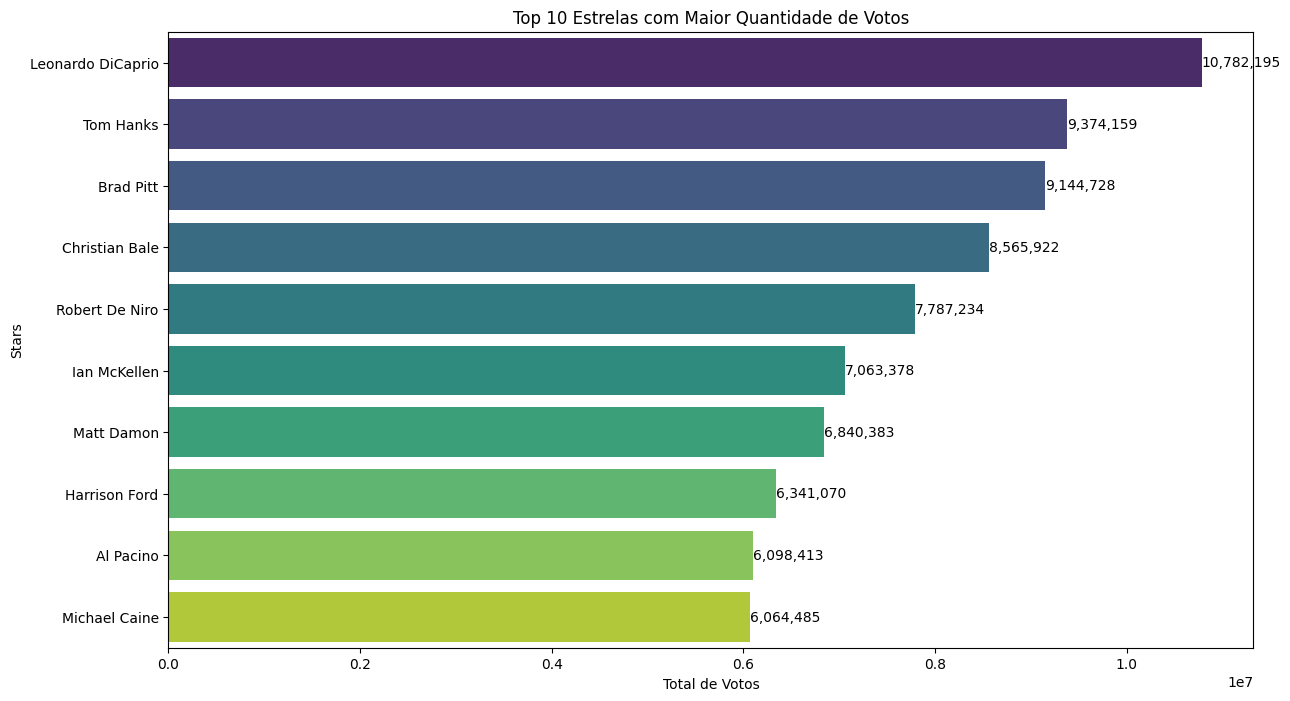

<ipython-input-447-cd94c97d6169>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=directors_votes_total.values, y=directors_votes_total.index, dodge=False, palette='viridis')


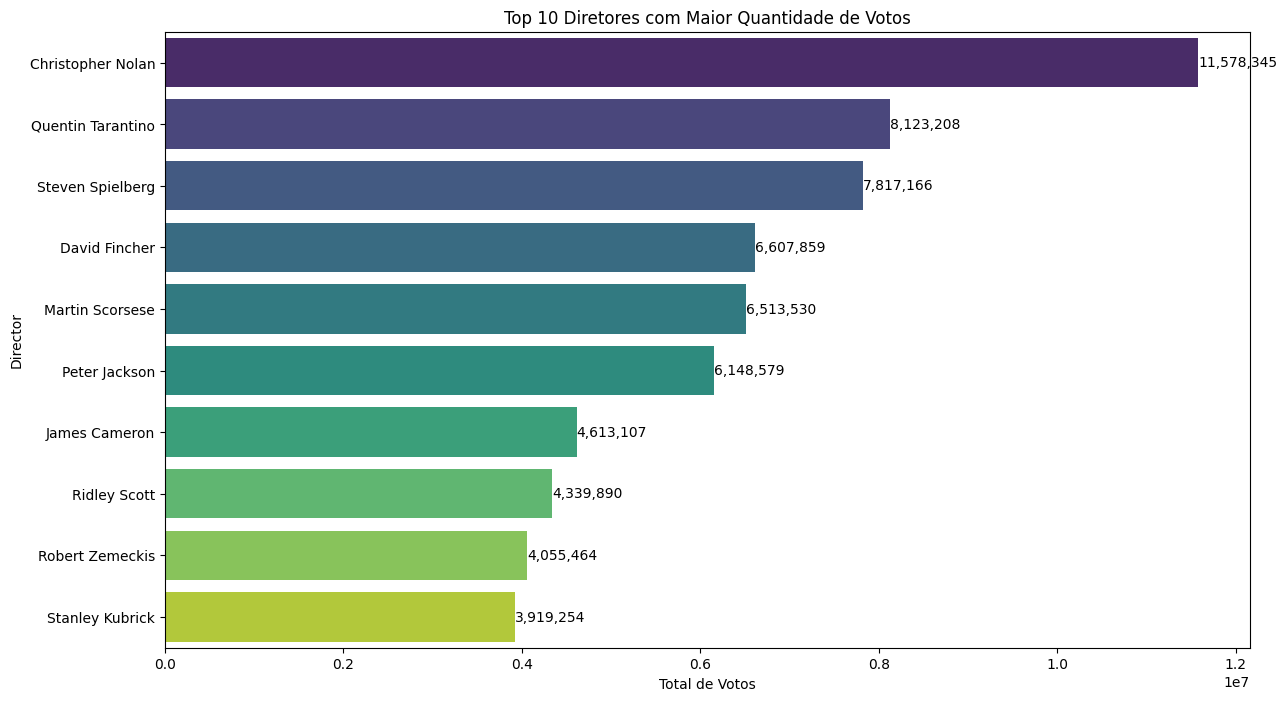

<ipython-input-447-cd94c97d6169>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=genres_votes_total.values, y=genres_votes_total.index, dodge=False, palette='viridis')


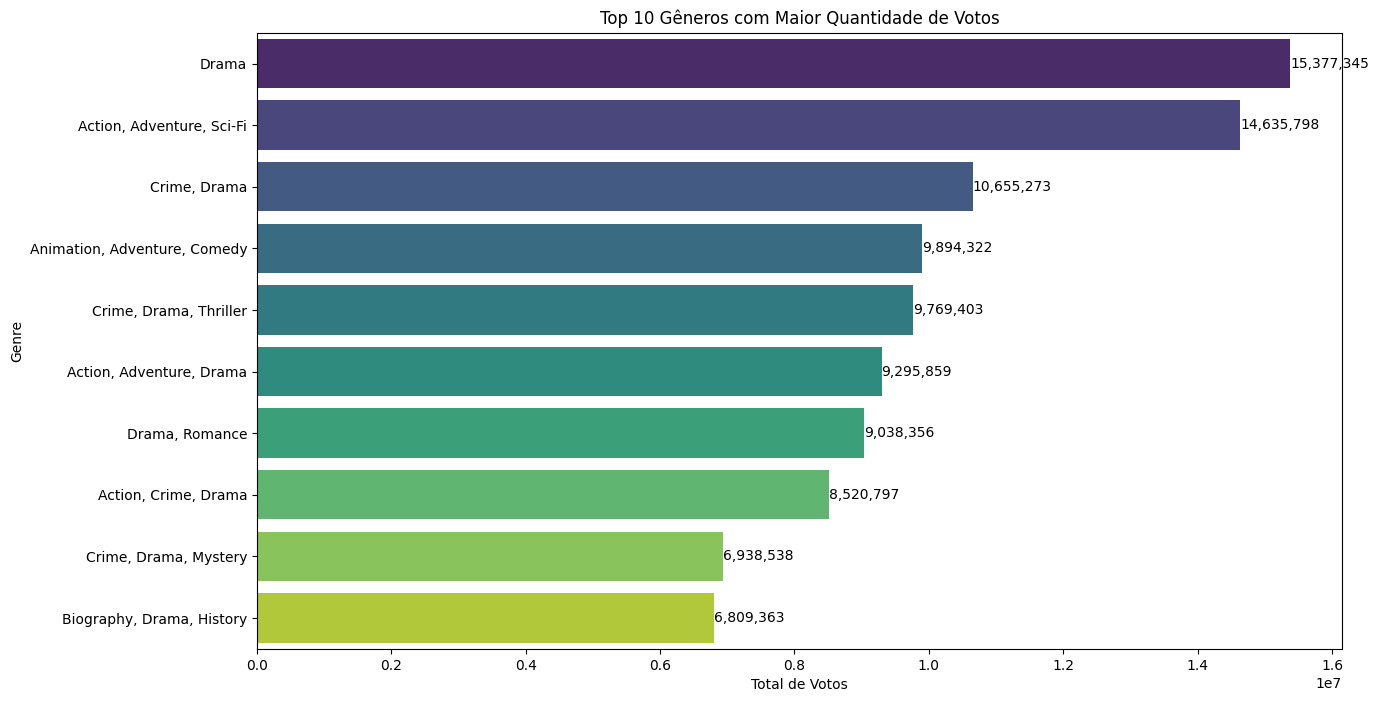

In [447]:

# Calcular a soma total de votos para cada estrela
stars_votes_total = df_exploded_stars.groupby('Stars')['No_of_Votes'].sum().sort_values(ascending=False).head(10)

# Plotar o gráfico para estrelas
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=stars_votes_total.values, y=stars_votes_total.index, dodge=False, palette='viridis')

# Adicionar rótulos de valor a cada barra
for i in range(len(stars_votes_total)):
    ax.text(stars_votes_total.values[i] + 1, i, f'{stars_votes_total.values[i]:,.0f}', color='black', va="center")

ax.set_xlabel('Total de Votos')
plt.title('Top 10 Estrelas com Maior Quantidade de Votos')
plt.show()

# Calcular a soma total de votos para cada diretor
directors_votes_total = df.groupby('Director')['No_of_Votes'].sum().sort_values(ascending=False).head(10)

# Plotar o gráfico para diretores
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=directors_votes_total.values, y=directors_votes_total.index, dodge=False, palette='viridis')

# Adicionar rótulos de valor a cada barra
for i in range(len(directors_votes_total)):
    ax.text(directors_votes_total.values[i] + 1, i, f'{directors_votes_total.values[i]:,.0f}', color='black', va="center")

ax.set_xlabel('Total de Votos')
plt.title('Top 10 Diretores com Maior Quantidade de Votos')
plt.show()

# Calcular a soma total de votos para cada gênero
genres_votes_total = df_exploded_genre.groupby('Genre')['No_of_Votes'].sum().sort_values(ascending=False).head(10)

# Plotar o gráfico para gêneros
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=genres_votes_total.values, y=genres_votes_total.index, dodge=False, palette='viridis')

# Adicionar rótulos de valor a cada barra
for i in range(len(genres_votes_total)):
    ax.text(genres_votes_total.values[i] + 1, i, f'{genres_votes_total.values[i]:,.0f}', color='black', va="center")

ax.set_xlabel('Total de Votos')
plt.title('Top 10 Gêneros com Maior Quantidade de Votos')
plt.show()

A partir da análise dos dados, é possível dizer que a alta expectativa de faturamento de um filme vem da popularidade de seu gênero, diretor e atores, tendo em vista que essas coisas geram popularidade ao filme, e a popularidade é um fator crucial para o faturamento.

In [448]:
df.head()

Series_Title  Released_Year Certificate  \
0                                  The Godfather           1972           A   
1                                The Dark Knight           2008          UA   
2                         The Godfather: Part II           1974           A   
3                                   12 Angry Men           1957           U   
4  The Lord of the Rings: The Return of the King           2003           U   

   Runtime                       Genre  IMDB_Rating  \
0      175              [Crime, Drama]         9.20   
1      152      [Action, Crime, Drama]         9.00   
2      202              [Crime, Drama]         9.00   
3       96              [Crime, Drama]         9.00   
4      201  [Action, Adventure, Drama]         8.90   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging patriarch t...      100.00   
1  When the menace known as the Joker wreaks havo...       84.00   
2  The early life and career of Vito Corleone in ...       90.00   
3  A jury holdout attempts to prevent a miscarria...       96.00   
4  Gandalf and Aragorn lead the World of Men agai...       94.00   

               Director           Star1            Star2          Star3  \
0  Francis Ford Coppola   Marlon Brando        Al Pacino     James Caan   
1     Christopher Nolan  Christian Bale     Heath Ledger  Aaron Eckhart   
2  Francis Ford Coppola       Al Pacino   Robert De Niro  Robert Duvall   
3          Sidney Lumet     Henry Fonda      Lee J. Cobb  Martin Balsam   
4         Peter Jackson     Elijah Wood  Viggo Mortensen   Ian McKellen   

           Star4  No_of_Votes        Gross  
0   Diane Keaton      1620367 134966411.00  
1  Michael Caine      2303232 534858444.00  
2   Diane Keaton      1129952  57300000.00  
3   John Fiedler       689845   4360000.00  
4  Orlando Bloom      1642758 377845905.00

Faça um top 10 dos diretores que mais aparecem no top 1000 do IMDB ( O csv)
Depois um top 10 das estrelas que mais aparecem



##Q2 - c) Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?



Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')


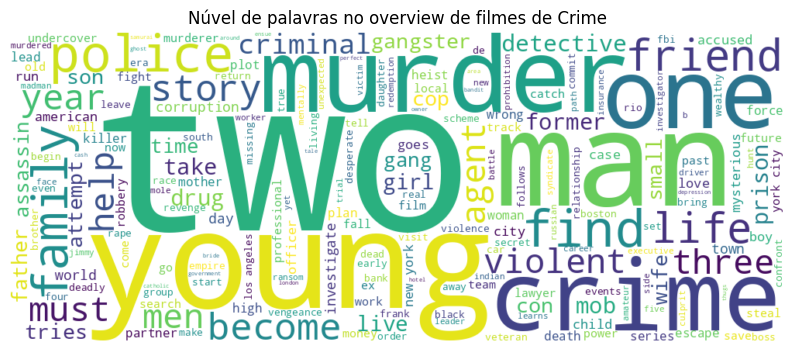

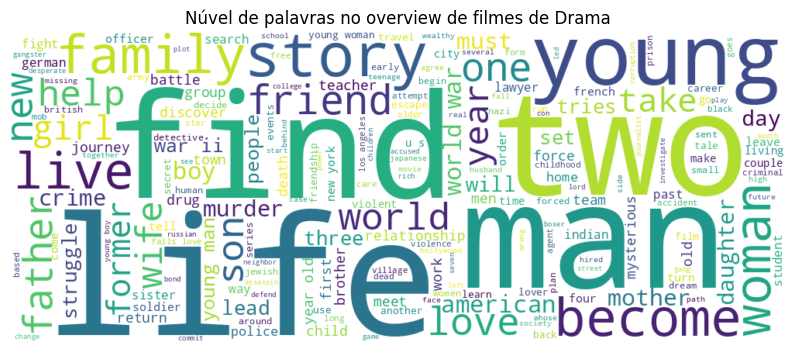

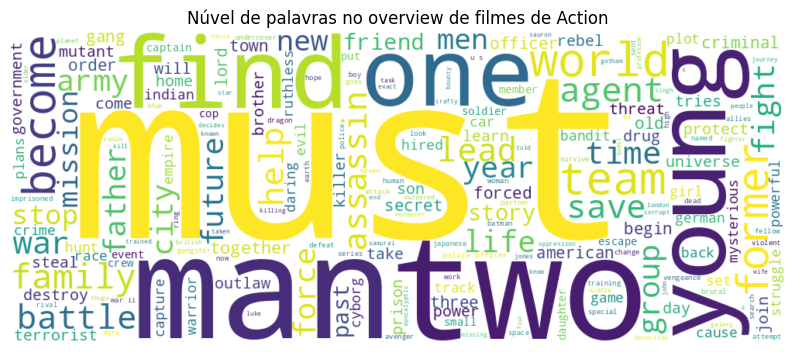

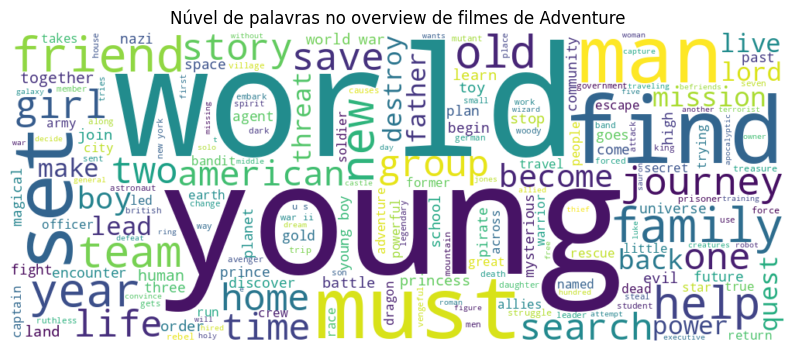

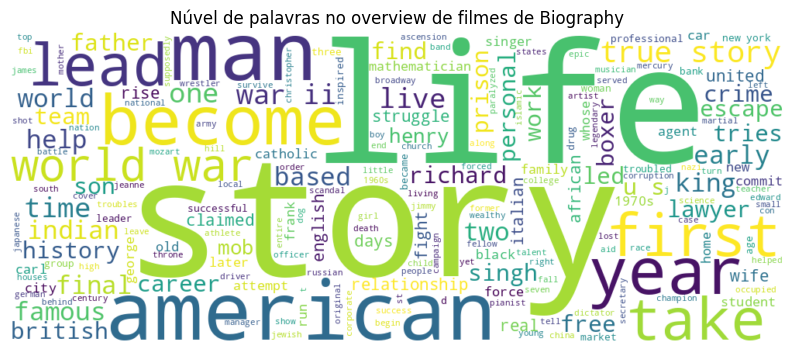

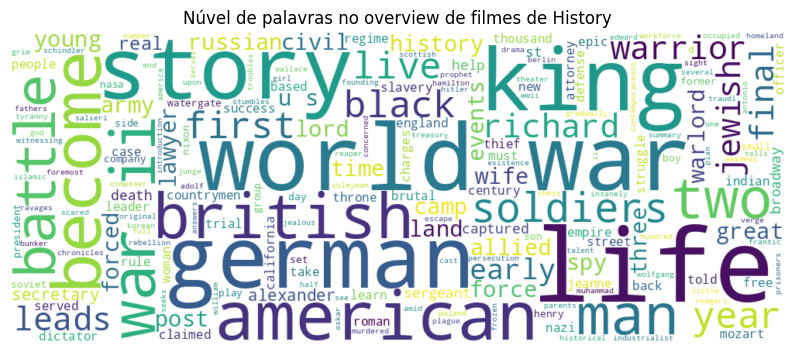

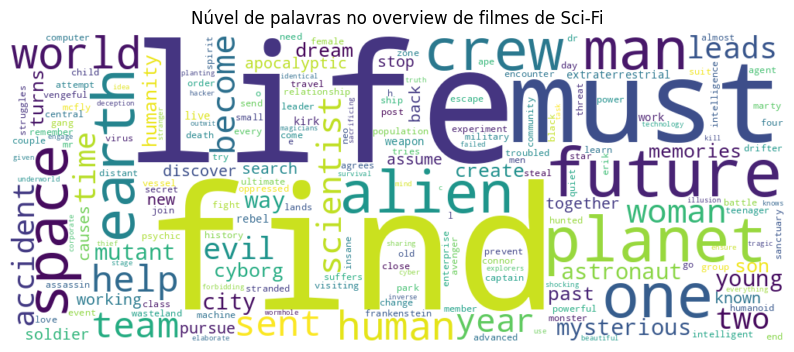

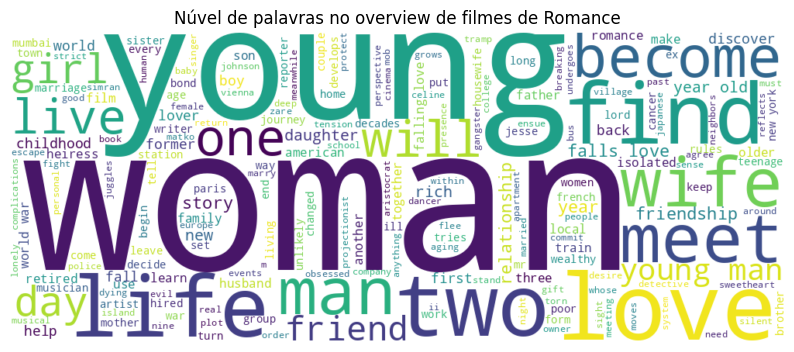

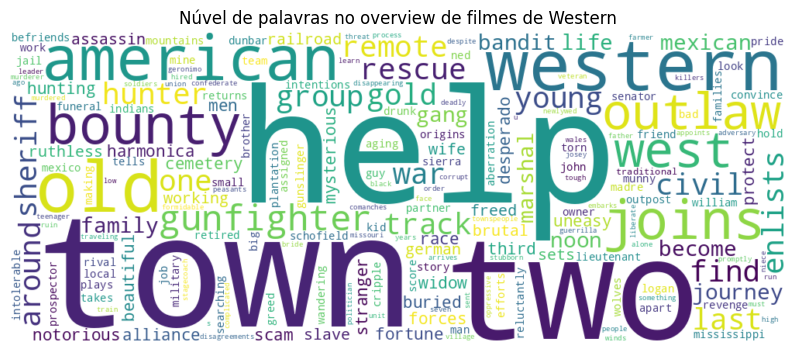

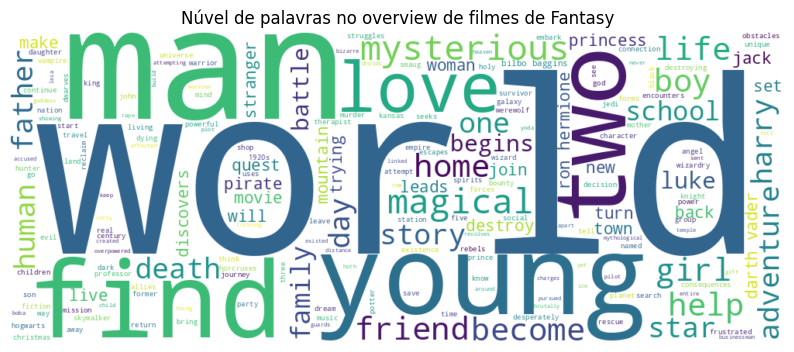

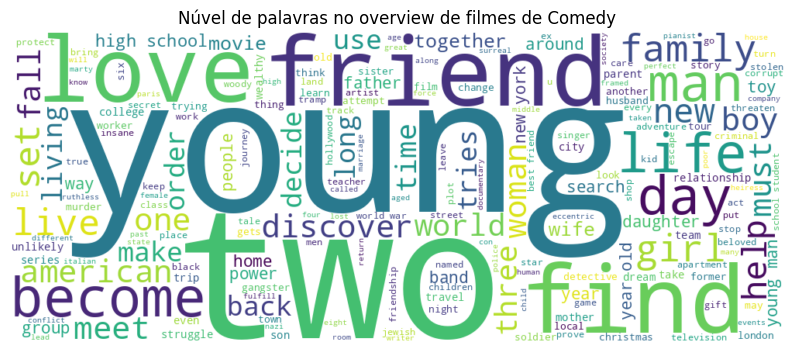

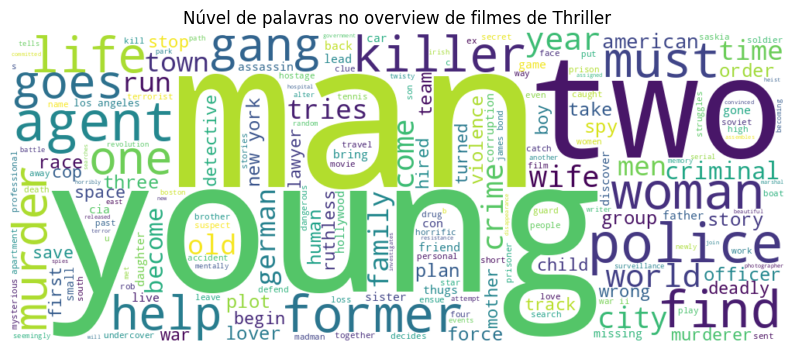

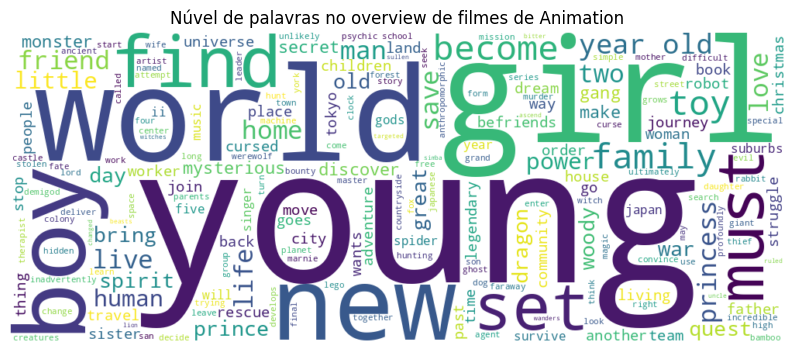

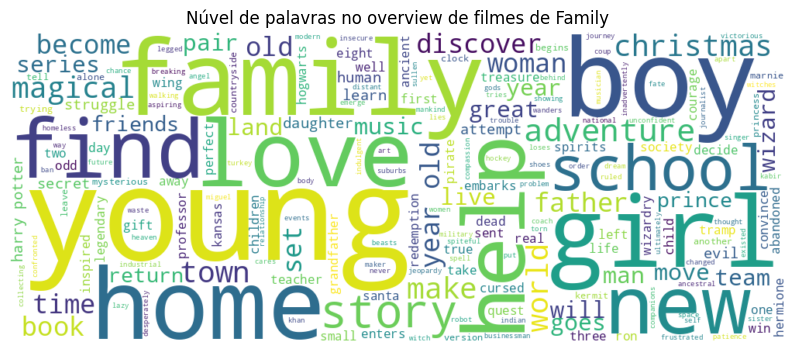

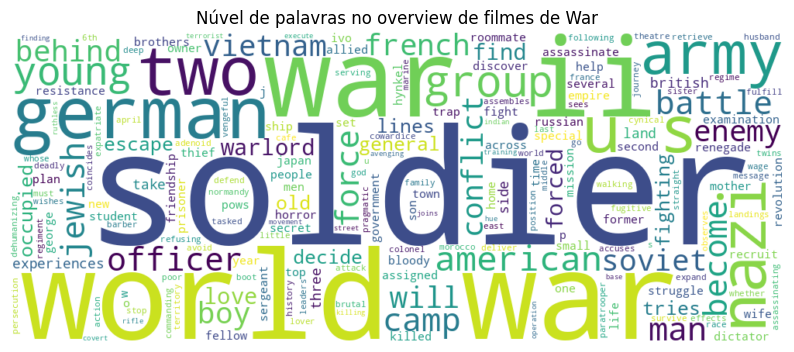

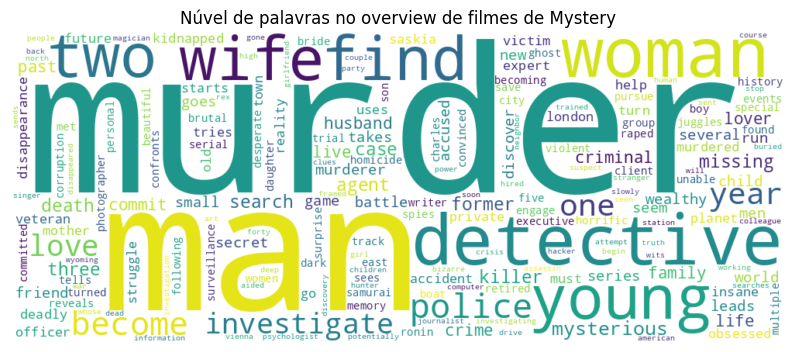

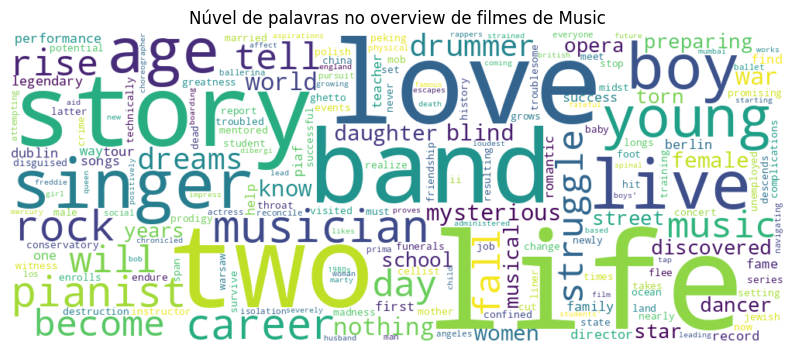

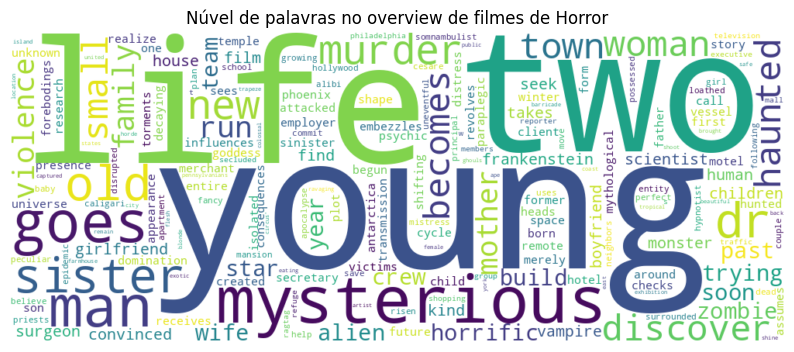

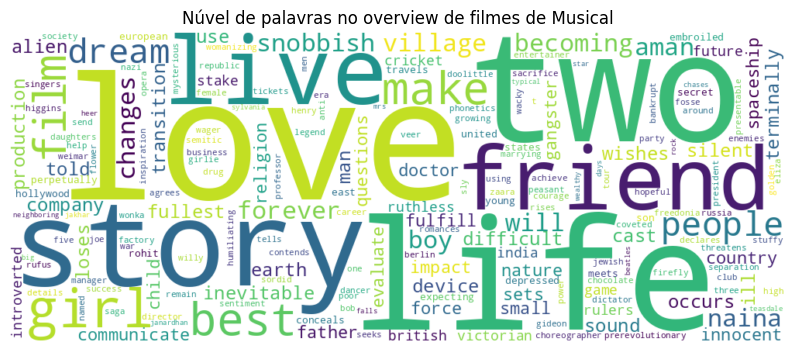

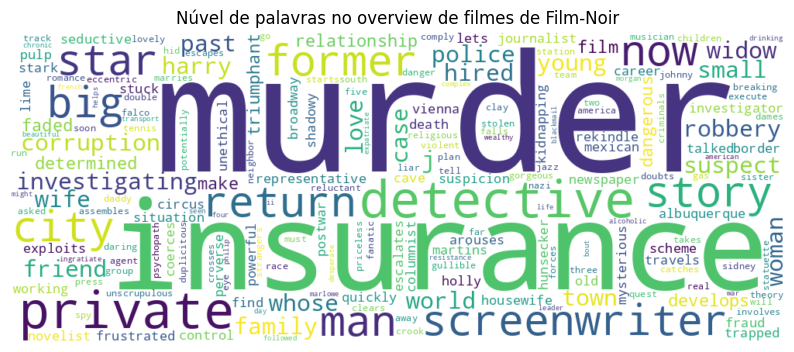

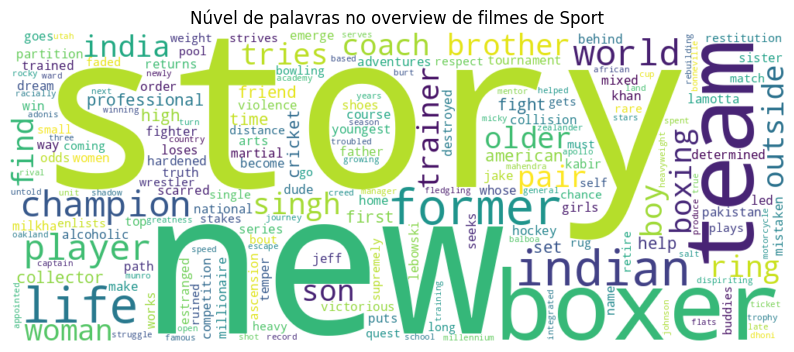

In [1380]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Verificar as colunas do DataFrame
print(df.columns)

# Explodir a coluna de gêneros para lidar com múltiplos gêneros em uma única célula
df_exploded_genre = df.explode('Genre').reset_index(drop=True)

# Remover entradas nulas nas colunas relevantes
df_exploded_genre = df_exploded_genre.dropna(subset=['Genre', 'Overview'])

# Definir stopwords
stopwords = set(STOPWORDS)

# Função para gerar e plotar a nuvem de palavras para um gênero específico
def plot_wordcloud_for_genre(genre, df):
    genre_overviews = df[df['Genre'] == genre]['Overview']
    all_overviews = ' '.join(genre_overviews.dropna())
    processed_text = ' '.join([word.lower() for word in all_overviews.split() if word.lower() not in stopwords])
    wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(processed_text)

    # Plotar a nuvem de palavras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Núvel de palavras no overview de filmes de {genre}')
    plt.show()

# Lista de gêneros únicos
unique_genres = df_exploded_genre['Genre'].unique()

# Gerar e plotar a nuvem de palavras para os 21 gêneros (ou ajustar conforme necessário)
for genre in unique_genres[:21]:
    plot_wordcloud_for_genre(genre, df_exploded_genre)



É possível observar que as palavras mais utilizadas variam de acordo com cada um dos gêneros de filmes, isso demonstra a possibilidade de inferir o gênero do filme a partir da coluna de sinopse do filme.

# Q3 e Q4 - Previsão da nota do IMDB


Eu faria a predição utilizando o aprendizado de máquinas, como o realizado a seguir:

Para prever a nota do IMDb, foram utilizadas as seguintes variáveis: Released_Year, Runtime, Meta_score, No_of_Votes, Gross, Certificate, e Genre. Algumas transformações foram necessárias para preparar os dados para o modelo de machine learning:

- Released_Year: Convertido para numérico para representar o ano de lançamento do filme.

- Certificate e Genre: Convertidos para variáveis dummy (indicadoras) para tratar categorias distintas de certificação e gêneros de filmes.

Os dados de atores e diretores não foram incluídos porque, embora possam influenciar a popularidade do filme (e, consequentemente, o número de votos), eles não contribuem diretamente para a nota do IMDb. Tornaram-se redundantes na análise, e, portanto, foram removidos visando uma melhor predição do modelo de machine learning.

O tipo de problema que estamos resolvendo é um problema de regressão, pois estamos tentando prever um valor contínuo, que é a nota do IMDb.

Um dos motivos da utilização da regressão linear é o fato de ela ser simples e fácil de interpretar, o que é útil para entender como cada variável influencia a nota do IMDb. Além disso, é rápida de treinar e implementar, sendo adequada para esse conjunto de dados. No entanto, suas desvantagens são que ela é sensível a outliers e não captura bem relações não-lineares entre as variáveis.

Para medir a performance do modelo, foi escolhida a métrica Root Mean Squared Error (RMSE). O RMSE é útil porque dá uma ideia da magnitude dos erros de previsão e penaliza erros grandes mais severamente do que erros pequenos. Além disso, é uma métrica comum para problemas de regressão, facilitando a comparação com outros modelos.

In [449]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pickle



# Remover valores ausentes nas colunas principais
df = df.dropna(subset=['Meta_score', 'No_of_Votes', 'Gross'])

# Garantir que colunas categóricas não contenham listas e transformar dados
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df['Certificate'] = df['Certificate'].astype(str)
df['Genre'] = df['Genre'].astype(str)

# Convertendo variáveis categóricas para variáveis dummy
df = pd.get_dummies(df, columns=['Certificate', 'Genre'], drop_first=True)

# Definir as variáveis de entrada (features) e a variável alvo (target)
X = df.drop(columns=['IMDB_Rating', 'Series_Title', 'Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4'])
y = df['IMDB_Rating']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

# Salvar o modelo treinado em um arquivo .pkl
with open('linear_regression_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Salvar as colunas de X_train em um arquivo .pkl para uso futuro
with open('feature_columns.pkl', 'wb') as columns_file:
    pickle.dump(X_train.columns.tolist(), columns_file)

# Dados do novo filme
new_movie = {
    'Released_Year': 1994,
    'Runtime': 142,
    'Meta_score': 80.0,
    'No_of_Votes': 2343110,
    'Gross': 28341469,
    'Certificate': 'R',
    'Genre': 'Drama'
}

# Criar um DataFrame com os dados do novo filme
new_movie_df = pd.DataFrame([new_movie])

# Converter colunas categóricas para variáveis dummy
new_movie_df = pd.get_dummies(new_movie_df, columns=['Certificate', 'Genre'])

# Carregar as colunas de X_train do arquivo .pkl
with open('feature_columns.pkl', 'rb') as columns_file:
    feature_columns = pickle.load(columns_file)

# Alinhar as colunas do novo DataFrame com o DataFrame de treino
new_movie_df = new_movie_df.reindex(columns=feature_columns, fill_value=0)

# Carregar o modelo treinado do arquivo .pkl
with open('linear_regression_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Fazer a predição para o novo filme
new_movie_pred = loaded_model.predict(new_movie_df)

print(f'A nota prevista do IMDb para o filme é: {new_movie_pred[0]}')


Root Mean Squared Error: 0.22725488642702793
A nota prevista do IMDb para o filme é: 9.285948724231874


O resultado foi satisfatório e se parece com a nota presente no site da imdb.
https://www.imdb.com/title/tt0111161/

# Requirements

In [175]:
%pip freeze >> requirements.txt